In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_mldata
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.metrics import confusion_matrix


Using TensorFlow backend.


In [2]:
raw_data=pd.read_excel('Assigment Data-BDA module.xlsx', index_col=0)  
raw_data['Difference']=raw_data['PriceReg']-raw_data['DiscountedPrice']
raw_data=raw_data[raw_data.Difference > 0]


In [4]:
#raw_data



,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,DiscountedPrice,PromotionPrice,Difference
Order,,,,,,,,,,,,,,
2,Historical,1737127,0.0,0.0,D,15,1,6.827430e+05,44.99,2015,8,28.97,31.84,16.02
3,Historical,3255963,0.0,0.0,D,7,1,1.016014e+06,24.81,2005,39,0.00,15.54,24.81
4,Historical,612701,0.0,0.0,D,0,0,3.404640e+05,46.00,2013,34,30.19,27.97,15.81
7,Historical,863939,1.0,1.0,D,2,1,1.287938e+06,121.95,2010,28,4.00,23.99,117.95
9,Historical,484059,0.0,0.0,D,13,1,2.314801e+06,95.95,2010,33,90.77,46.49,5.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208023,Active,109683,NaN,NaN,D,7,1,2.101869e+05,72.87,2006,54,8.46,60.59,64.41
208024,Active,416462,NaN,NaN,D,8,1,4.555041e+05,247.00,2009,65,8.40,74.85,238.60
208025,Active,658242,NaN,NaN,S,2,1,1.692746e+05,50.00,2012,23,23.98,32.62,26.02


In [5]:
labelling = preprocessing.LabelEncoder()
raw_data['File_Type'] = labelling.fit_transform(raw_data.File_Type.values)
raw_data


,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,DiscountedPrice,PromotionPrice,Difference
Order,,,,,,,,,,,,,,
2,1,1737127,0.0,0.0,D,15,1,6.827430e+05,44.99,2015,8,28.97,31.84,16.02
3,1,3255963,0.0,0.0,D,7,1,1.016014e+06,24.81,2005,39,0.00,15.54,24.81
4,1,612701,0.0,0.0,D,0,0,3.404640e+05,46.00,2013,34,30.19,27.97,15.81
7,1,863939,1.0,1.0,D,2,1,1.287938e+06,121.95,2010,28,4.00,23.99,117.95
9,1,484059,0.0,0.0,D,13,1,2.314801e+06,95.95,2010,33,90.77,46.49,5.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208023,0,109683,NaN,NaN,D,7,1,2.101869e+05,72.87,2006,54,8.46,60.59,64.41
208024,0,416462,NaN,NaN,D,8,1,4.555041e+05,247.00,2009,65,8.40,74.85,238.60
208025,0,658242,NaN,NaN,S,2,1,1.692746e+05,50.00,2012,23,23.98,32.62,26.02


In [8]:
Historical_data = raw_data[raw_data['File_Type']==1]
Active_data = raw_data[raw_data['File_Type']==0]


In [9]:
target = Historical_data['SoldFlag']



In [10]:
    Active_data = Active_data.loc[:, Active_data.columns != 'SoldFlag']
    Active_data = Active_data.loc[:, Active_data.columns != 'MarketingType']
    Active_data = Active_data.loc[:, Active_data.columns != 'SoldCount']
    Active_data = Active_data.loc[:, Active_data.columns != 'DiscountedPrice']
    Active_data = Active_data.loc[:, Active_data.columns != 'PriceReg']
    Active_data = Active_data.loc[:, Active_data.columns != 'SKU_number']

    Historical_data = Historical_data.loc[:, Historical_data.columns != 'SoldFlag']
    Historical_data = Historical_data.loc[:, Historical_data.columns != 'MarketingType']
    Historical_data = Historical_data.loc[:, Historical_data.columns != 'SoldCount']
    Historical_data = Historical_data.loc[:, Historical_data.columns != 'DiscountedPrice']
    Historical_data = Historical_data.loc[:, Historical_data.columns != 'PriceReg']
    Historical_data = Historical_data.loc[:, Historical_data.columns != 'SKU_number']



In [11]:
Historical_train, Historical_test, target_train, target_test= train_test_split(Historical_data,target,random_state=50)


In [12]:
#create an object of the type GaussianNB
model_GaussianNB = Pipeline(steps=[('scaler', StandardScaler()), ('classifier', GaussianNB())])



In [13]:
model_GaussianNB.fit(Historical_train, np.array(target_train).reshape(-1))  # fit the model
Historical_test


,File_Type,ReleaseNumber,New_Release_Flag,StrengthFactor,ReleaseYear,ItemCount,PromotionPrice,Difference
Order,,,,,,,,
65042,1,3,1,857244.0,2008,23,58.71,28.02
29548,1,1,0,1525102.0,2002,37,23.94,33.21
22383,1,10,1,4100724.0,2000,20,38.91,65.12
11718,1,5,1,2146573.0,2005,43,15.15,47.66
57127,1,7,1,607989.0,2011,50,71.94,46.96
...,...,...,...,...,...,...,...,...
60731,1,2,1,186409.0,2007,49,49.99,18.96
45412,1,4,1,926880.0,2009,27,32.70,43.95
83626,1,2,1,179293.0,2013,26,37.39,14.45


In [15]:
pred = model_GaussianNB.predict(Historical_test)



In [16]:
#train the algorithm on training data and predict using the testing data
pred = model_GaussianNB.fit(Historical_train, target_train).predict(Historical_test)


In [17]:
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))


Naive-Bayes accuracy :  0.8014261852756007


In [18]:
#Using Neural Networks
model_NN = Sequential()



In [19]:
model_NN.add(Dense(64, activation='relu', input_dim=8))


In [20]:
model_NN.add(Dense(32, activation='relu'))


In [21]:
model_NN.add(Dense(1, activation='sigmoid'))


In [22]:
model_NN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
              
              

In [23]:
model_NN.fit(Historical_train, target_train, epochs=2)


Epoch 1/2
46697/46697 [==============================] - 6s 127us/step - loss: 3538.1794 - accuracy: 0.7536 2 - ETA: 0s - loss: 3632.5612 - accuracy: 0.
Epoch 2/2
46697/46697 [==============================] - 5s 113us/step - loss: 1045.2914 - accuracy: 0.7469


In [24]:
scores = model_NN.evaluate(Historical_test, target_test)


15566/15566 [==============================] - 1s 42us/step


In [26]:
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))


Testing Accuracy: 82.46%



In [27]:
target_test_pred = model_NN.predict_classes(Active_data)


In [29]:
Active_data['Keep'] = target_test_pred
Active_data


,File_Type,ReleaseNumber,New_Release_Flag,StrengthFactor,ReleaseYear,ItemCount,PromotionPrice,Difference,Keep
Order,,,,,,,,,
85107,0,9,1,1.251478e+06,2018,49,69.08,81.36,0
85108,0,4,1,2.407071e+06,2016,0,49.00,49.00,0
85109,0,3,1,6.890734e+06,2016,0,0.00,44.95,0
85110,0,8,1,9.156233e+04,2014,44,59.81,205.29,1
85111,0,5,1,6.922798e+06,2016,0,79.80,83.95,0
...,...,...,...,...,...,...,...,...,...
208023,0,7,1,2.101869e+05,2006,54,60.59,64.41,0
208024,0,8,1,4.555041e+05,2009,65,74.85,238.60,0
208025,0,2,1,1.692746e+05,2012,23,32.62,26.02,0


In [30]:
test_data=Active_data[Active_data['Keep']==1]
test_data

,File_Type,ReleaseNumber,New_Release_Flag,StrengthFactor,ReleaseYear,ItemCount,PromotionPrice,Difference,Keep
Order,,,,,,,,,
85110,0,8,1,91562.33375,2014,44,59.81,205.29,1
85165,0,1,0,104661.25630,2005,43,13.72,19.03,1
85607,0,4,1,117351.34250,2012,22,123.97,137.76,1
85619,0,14,1,75796.19000,2012,45,186.19,177.23,1
85888,0,0,0,97300.71000,2015,24,63.64,135.30,1
...,...,...,...,...,...,...,...,...,...
207859,0,1,0,86027.97500,2014,69,56.46,83.16,1
207882,0,3,1,95620.16125,2008,74,32.62,44.69,1
207889,0,2,1,23359.67375,2012,134,21.00,92.37,1


In [31]:
finding_duplicate=raw_data[raw_data.duplicated(keep=False)]
print(finding_duplicate)


Empty DataFrame
Columns: [File_Type, SKU_number, SoldFlag, SoldCount, MarketingType, ReleaseNumber, New_Release_Flag, StrengthFactor, PriceReg, ReleaseYear, ItemCount, DiscountedPrice, PromotionPrice, Difference]
Index: []


In [32]:
test_data

,File_Type,ReleaseNumber,New_Release_Flag,StrengthFactor,ReleaseYear,ItemCount,PromotionPrice,Difference,Keep
Order,,,,,,,,,
85110,0,8,1,91562.33375,2014,44,59.81,205.29,1
85165,0,1,0,104661.25630,2005,43,13.72,19.03,1
85607,0,4,1,117351.34250,2012,22,123.97,137.76,1
85619,0,14,1,75796.19000,2012,45,186.19,177.23,1
85888,0,0,0,97300.71000,2015,24,63.64,135.30,1
...,...,...,...,...,...,...,...,...,...
207859,0,1,0,86027.97500,2014,69,56.46,83.16,1
207882,0,3,1,95620.16125,2008,74,32.62,44.69,1
207889,0,2,1,23359.67375,2012,134,21.00,92.37,1


In [33]:

Active_data = raw_data[raw_data['File_Type']==0]
Active_data

,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,DiscountedPrice,PromotionPrice,Difference
Order,,,,,,,,,,,,,,
85107,0,869734,NaN,NaN,S,9,1,1.251478e+06,92.82,2018,49,11.46,69.08,81.36
85108,0,3741319,NaN,NaN,S,4,1,2.407071e+06,49.00,2016,0,0.00,49.00,49.00
85109,0,3517789,NaN,NaN,S,3,1,6.890734e+06,44.95,2016,0,0.00,0.00,44.95
85110,0,1455936,NaN,NaN,S,8,1,9.156233e+04,219.00,2014,44,13.71,59.81,205.29
85111,0,2921480,NaN,NaN,S,5,1,6.922798e+06,83.95,2016,0,0.00,79.80,83.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208023,0,109683,NaN,NaN,D,7,1,2.101869e+05,72.87,2006,54,8.46,60.59,64.41
208024,0,416462,NaN,NaN,D,8,1,4.555041e+05,247.00,2009,65,8.40,74.85,238.60
208025,0,658242,NaN,NaN,S,2,1,1.692746e+05,50.00,2012,23,23.98,32.62,26.02


In [35]:
res = test_data.merge(Active_data, how='inner', on=['ReleaseNumber', 'New_Release_Flag','StrengthFactor','PromotionPrice','Difference'])
res

,File_Type_x,ReleaseNumber,New_Release_Flag,StrengthFactor,ReleaseYear_x,ItemCount_x,PromotionPrice,Difference,Keep,File_Type_y,SKU_number,SoldFlag,SoldCount,MarketingType,PriceReg,ReleaseYear_y,ItemCount_y,DiscountedPrice
0,0,8,1,91562.33375,2014,44,59.81,205.29,1,0,1455936,NaN,NaN,S,219.00,2014,44,13.71
1,0,1,0,104661.25630,2005,43,13.72,19.03,1,0,246495,NaN,NaN,S,25.95,2005,43,6.92
2,0,4,1,117351.34250,2012,22,123.97,137.76,1,0,639828,NaN,NaN,D,216.75,2012,22,78.99
3,0,14,1,75796.19000,2012,45,186.19,177.23,1,0,533566,NaN,NaN,D,227.95,2012,45,50.72
4,0,0,0,97300.71000,2015,24,63.64,135.30,1,0,1596358,NaN,NaN,D,188.95,2015,24,53.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,0,1,0,86027.97500,2014,69,56.46,83.16,1,0,1482356,NaN,NaN,S,104.80,2014,69,21.64
6396,0,3,1,95620.16125,2008,74,32.62,44.69,1,0,118731,NaN,NaN,S,53.32,2008,74,8.63
6397,0,2,1,23359.67375,2012,134,21.00,92.37,1,0,557032,NaN,NaN,D,97.60,2012,134,5.23
6398,0,0,0,122183.92250,1975,120,14.52,22.20,1,0,874324,NaN,NaN,S,26.20,1975,120,4.00


In [36]:
final=res['SKU_number']

final

0       1455936
1        246495
2        639828
3        533566
4       1596358
         ...   
6395    1482356
6396     118731
6397     557032
6398     874324
6399     416662
Name: SKU_number, Length: 6400, dtype: int64

In [286]:
#c_matrix = confusion_matrix(target_test, target_test_pred)


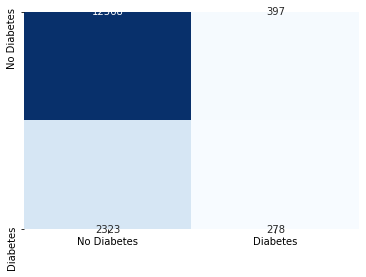

In [287]:
#ax = sns.heatmap(c_matrix,  annot=True, fmt="d",
                 #xticklabels=['Should Sell', 'Not Sell'],
                 #yticklabels=['Not Sell', 'Should Sell'], 
                 #cbar=False, cmap='Blues')



In [235]:
#Active_data['Keep'] = Active_pred


In [217]:
#Active_data


,File_Type,SKU_number,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,DiscountedPrice,PromotionPrice,Difference,Keep
Order,,,,,,,,,,,,
85107,0,869734,9,1,1.251478e+06,92.82,2018,49,11.46,69.08,81.36,0.0
85108,0,3741319,4,1,2.407071e+06,49.00,2016,0,0.00,49.00,49.00,0.0
85109,0,3517789,3,1,6.890734e+06,44.95,2016,0,0.00,0.00,44.95,0.0
85110,0,1455936,8,1,9.156233e+04,219.00,2014,44,13.71,59.81,205.29,0.0
85111,0,2921480,5,1,6.922798e+06,83.95,2016,0,0.00,79.80,83.95,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
208023,0,109683,7,1,2.101869e+05,72.87,2006,54,8.46,60.59,64.41,0.0
208024,0,416462,8,1,4.555041e+05,247.00,2009,65,8.40,74.85,238.60,1.0
208025,0,658242,2,1,1.692746e+05,50.00,2012,23,23.98,32.62,26.02,0.0


In [245]:
#raw_data=pd.read_excel('Assigment Data-BDA module.xlsx', index_col=0)  
#raw_data['Difference']=raw_data['PriceReg']-raw_data['DiscountedPrice']
#raw_data=raw_data[raw_data.Difference > 0]



In [248]:
#test_data=raw_data[raw_data['SKU_number']==416462]



